<h1 style="font-size:200%"> <center> Customer Segementation</center></h1>

---


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score, silhouette_score

from flask import Flask,jsonify,request,render_template

%matplotlib inline

## About the Dataset

The [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) dataset contains a description of the ideal customers of a company. It contains 29 columns detailing the habits and demographic of the customer. The features are divided into 5 categories

<h2 style="font-size:100%"> People:</h2>

| # | Feature | Description
| --- | --- | --- 
| 1 | ID | Customer's unique identifier
| 2 | Year_Birth | Customer's birth year
| 3 | Education | Customer's education level
| 4 | Marital_Status | Customer's marital status
| 5 | Income | Customer's yearly household income
| 6 | Kidhome | Number of children in customer's household
| 7 | Teenhome | Number of teenagers in customer's household
| 8 | Dt_Customer | Date of customer's enrollment with the company
| 9 | Recency | Number of days since customer's last purchase
| 10 | Complain | 1 if the customer complained in the last 2 years, 0 otherwise

<h2 style="font-size:100%"> Products:</h2>

| # | Feature | Description
| --- | --- | --- 
| 11 | MntWines | Amount spent on wine in last 2 years
| 12 | MntFruits | Amount spent on fruits in last 2 years
| 13 | MntMeatProducts | Amount spent on meat in last 2 years
| 14 | MntFishProducts | Amount spent on fish in last 2 years
| 15 | MntSweetProducts | Amount spent on sweets in last 2 years
| 16 | MntGoldProds | Amount spent on gold in last 2 years

<h2 style="font-size:100%"> Promotion:</h2>

| # | Feature | Description
| --- | --- | --- 
| 17 | NumDealsPurchases | Number of purchases made with a discount
| 18 | AcceptedCmp1 | 1 if customer accepted the offer in the 1st campaign, 0 otherwise
| 19 | AcceptedCmp2 | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
| 20 | AcceptedCmp3 | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
| 21 | AcceptedCmp4 | 1 if customer accepted the offer in the 4th campaign, 0 otherwise
| 22 | AcceptedCmp5 | 1 if customer accepted the offer in the 5th campaign, 0 otherwise
| 23 | Response | 1 if customer accepted the offer in the last campaign, 0 otherwise

<h2 style="font-size:100%"> Place:</h2>

| # | Feature | Description
| --- | --- | --- 
| 24 | NumWebPurchases | Number of purchases made through the company’s website
| 25 | NumCatalogPurchases | Number of purchases made using a catalogue
| 26 | NumStorePurchases | Number of purchases made directly in stores
| 27 | NumWebVisitsMonth | Number of visits to company’s website in the last month

<h2 style="font-size:100%"> Uncategorized:</h2>

| # | Feature | Description
| --- | --- | --- 
| 28 | Z_CostContact | -
| 29 | Z_Revenue | -

# 2 Data Overview <a class="anchor" id="overview"></a>

## 2.1 Data Reading <a class="anchor" id="data_read"></a>

In [13]:
df = pd.read_csv("/content/marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 2.2 Dataset Info <a class="anchor" id="data_info"></a>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## 2.3 Numerical Description <a class="anchor" id="num_des"></a>

In [15]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## 2.4 Categorical Description <a class="anchor" id="cat_des"></a>

In [16]:
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


# 3 EDA <a class="anchor" id="eda"></a>

In [17]:
def set_labels(x="", y="", title="", axis=None):
  if axis:
    axis.set_xlabel(x);
    axis.set_ylabel(y);
    axis.set_title(title);
  else:
    plt.title(title);
    plt.xlabel(x);
    plt.ylabel(y);

## 3.1 People <a class="anchor" id="eda_people"></a>

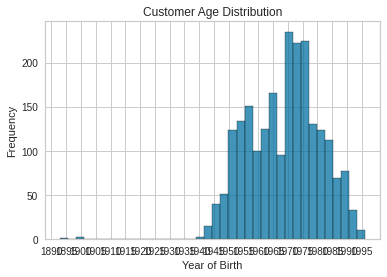

In [18]:
set_labels(x="Year of Birth", y="Frequency", title="Customer Age Distribution")
plt.xticks(list(range(1830,2000,5)))
sns.histplot(df['Year_Birth']);

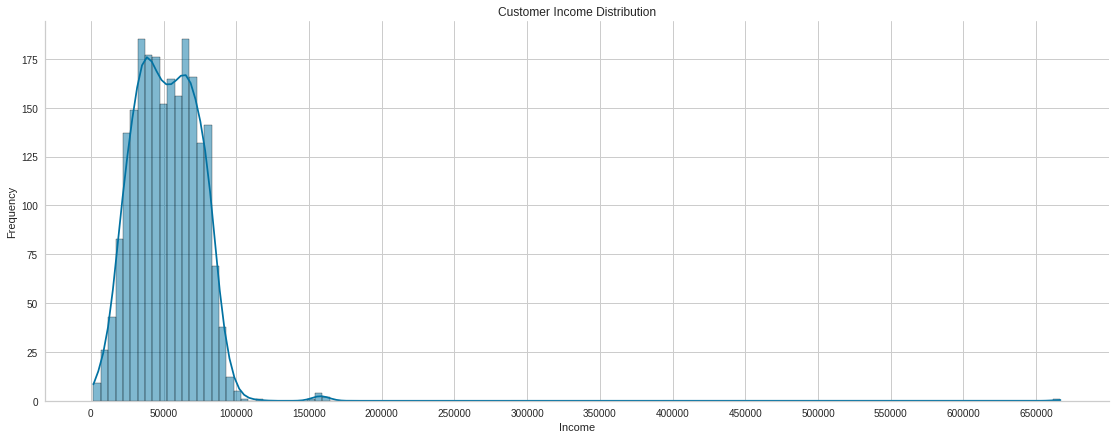

In [19]:
sns.displot(df['Income'], kde=True, height=6, aspect=2.6);
plt.xticks(list(range(0,700000,50000)))

set_labels(x="Income", y="Frequency", title="Customer Income Distribution")

# 4 Data Cleaning <a class="anchor" id="cleaning"></a>

## 4.1 Missing Values <a class="anchor" id="cleaning_missing"></a>

In [20]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [21]:
df = df.dropna()
df.shape

(2216, 29)

## 4.2 Incorrect Types <a class="anchor" id="cleaning_incorrect"></a>

In [22]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [23]:
df.Dt_Customer = pd.to_datetime(df['Dt_Customer']).dt.year

df['Dt_Customer']

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Dt_Customer, Length: 2216, dtype: int64

## 4.3 Inconsistent Values <a class="anchor" id="cleaning_inconsistent"></a>

In [24]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [25]:
df.Education.replace({"Graduation": "UnderGraduate",
                      "Basic": "High School",
                      "2n Cycle":"Master"},
                      inplace=True)

df.Education.unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array(['UnderGraduate', 'PhD', 'Master', 'High School'], dtype=object)

In [26]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [27]:
df.Marital_Status.replace({"Together": "In Relationship",
                           "Married": "In Relationship",
                           "Divorced":"Single",
                           "Widow": "Single",
                           "Alone": "Single",
                           "Absurd": "Single",
                           "YOLO": "Single"},
                           inplace=True)

df.Marital_Status.unique()

array(['Single', 'In Relationship'], dtype=object)

## 4.4 Outlier Removal <a class="anchor" id="cleaning_outliers"></a>



In [28]:
df = df.loc[df.Year_Birth  >= 1935]
df = df.loc[df.Income  <= 200000]

df.shape

(2212, 29)

We got rid of 4 rows in the process of removing outliers.

## 4.5 Remove unneeded Columns <a class="anchor" id="cleaning_unneeded"></a>




In [29]:
df.Z_Revenue.value_counts()

11    2212
Name: Z_Revenue, dtype: int64

In [30]:
df.Z_CostContact.value_counts()

3    2212
Name: Z_CostContact, dtype: int64

In [31]:
df.drop(columns=['ID', 'Z_Revenue', 'Z_CostContact'], inplace=True)

## 4.6 Rename Unmeaningful Column Names <a class="anchor" id="cleaning_rename"></a>



In [32]:
df.rename(columns={'Response': 'AcceptedCmpCurrent', 'Dt_Customer':'CustomerSince'}, inplace=True)

# 5 Feature Engineering <a class="anchor" id="eng"></a>


## 5.1 Total Number of Purchases <a class="anchor" id="eng_tot_pur"></a>



In [33]:
cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['NumPurchases'] = df[cols].sum(axis=1)

df['NumPurchases']

0       22
1        4
2       20
3        6
4       14
        ..
2235    16
2236    15
2237    18
2238    21
2239     8
Name: NumPurchases, Length: 2212, dtype: int64

## 5.2 Amount Spent <a class="anchor" id="eng_amt_spnt"></a>


In [34]:
cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['AmountSpent'] = df[cols].sum(axis=1)

df['AmountSpent']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: AmountSpent, Length: 2212, dtype: int64

## 5.3 Amount per Purchase <a class="anchor" id="eng_amt_pur"></a>



In [35]:
df['AmountPerPurchase'] = df['AmountSpent'] / (df['NumPurchases'] + 1e-1)

df['AmountPerPurchase']

0       73.167421
1        6.585366
2       38.606965
3        8.688525
4       29.929078
          ...    
2235    83.291925
2236    29.403974
2237    68.563536
2238    39.952607
2239    21.234568
Name: AmountPerPurchase, Length: 2212, dtype: float64

## 5.4 Persons in Home <a class="anchor" id="eng_person"></a>



In [36]:
cols = ['Kidhome', 'Teenhome']
df['PersonsInHome'] = df[cols].sum(axis=1) + 2
df.loc[(df.Marital_Status == 'Single')].PersonsInHome = df.loc[(df.Marital_Status == 'Single')].PersonsInHome - 1

df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,CustomerSince,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmpCurrent,NumPurchases,AmountSpent,AmountPerPurchase,PersonsInHome
0,1957,UnderGraduate,Single,58138.0,0,0,2012,58,635,88,...,0,0,0,0,0,1,22,1617,73.167421,2
1,1954,UnderGraduate,Single,46344.0,1,1,2014,38,11,1,...,0,0,0,0,0,0,4,27,6.585366,4
2,1965,UnderGraduate,In Relationship,71613.0,0,0,2013,26,426,49,...,0,0,0,0,0,0,20,776,38.606965,2
3,1984,UnderGraduate,In Relationship,26646.0,1,0,2014,26,11,4,...,0,0,0,0,0,0,6,53,8.688525,3
4,1981,PhD,In Relationship,58293.0,1,0,2014,94,173,43,...,0,0,0,0,0,0,14,422,29.929078,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,UnderGraduate,In Relationship,61223.0,0,1,2013,46,709,43,...,0,0,0,0,0,0,16,1341,83.291925,3
2236,1946,PhD,In Relationship,64014.0,2,1,2014,56,406,0,...,0,0,1,0,0,0,15,444,29.403974,5
2237,1981,UnderGraduate,Single,56981.0,0,0,2014,91,908,48,...,1,0,0,0,0,0,18,1241,68.563536,2
2238,1956,Master,In Relationship,69245.0,0,1,2014,8,428,30,...,0,0,0,0,0,0,21,843,39.952607,3


# 6 Preprocessing <a class="anchor" id="pre"></a>


In [37]:
df2 = df.copy()

## 6.1 Categorical Encoding <a class="anchor" id="pre_enc"></a>

In [38]:
categorical = df2.select_dtypes(include=["object"])

le = LabelEncoder()
for col in categorical:
  df2[col] = le.fit_transform(df2[col])

df2.dtypes

Year_Birth               int64
Education                int64
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
CustomerSince            int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
AcceptedCmpCurrent       int64
NumPurchases             int64
AmountSpent              int64
AmountPerPurchase      float64
PersonsInHome            int64
dtype: object

## 6.2 Feature Scaling <a class="anchor" id="pre_scale"></a>

In [39]:
sc = StandardScaler()

df2 = pd.DataFrame(sc.fit_transform(df2), columns=df2.columns)
df2

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,CustomerSince,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmpCurrent,NumPurchases,AmountSpent,AmountPerPurchase,PersonsInHome
0,-1.018352,0.884842,1.349603,0.287105,-0.822754,-0.929699,-1.499086,0.310353,0.977660,1.552041,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,2.375425,1.309461,1.676245,1.199502,-1.264598
1,-1.274785,0.884842,1.349603,-0.260882,1.040021,0.908097,1.417341,-0.380813,-0.872618,-0.637461,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,-1.189221,-0.963297,-1.029196,1.404572
2,-0.334530,0.884842,-0.740959,0.913196,-0.822754,-0.929699,-0.040872,-0.795514,0.357935,0.570540,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,1.031830,0.280110,0.042661,-1.264598
3,1.289547,0.884842,-0.740959,-1.176114,1.040021,-0.929699,1.417341,-0.795514,-0.872618,-0.561961,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,-0.911590,-0.920135,-0.958797,0.069987
4,1.033114,-0.222211,-0.740959,0.294307,1.040021,-0.929699,1.417341,1.554453,-0.392257,0.419540,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,0.198936,-0.307562,-0.247813,0.069987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.163575,0.884842,-0.740959,0.430444,-0.822754,0.908097,-0.040872,-0.104347,1.197084,0.419540,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,0.476567,1.218061,1.538399,0.069987
2208,-1.958607,-0.222211,-0.740959,0.560123,2.902796,0.908097,1.417341,0.241237,0.298631,-0.662628,...,-0.282981,-0.280175,3.818045,-0.117256,-0.09552,-0.420977,0.337751,-0.271040,-0.265390,2.739158
2209,1.033114,0.884842,1.349603,0.233347,-0.822754,-0.929699,1.417341,1.450778,1.787156,0.545373,...,3.533809,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,0.754198,1.052052,1.045396,-1.264598
2210,-1.103830,-1.329265,-0.740959,0.803172,-0.822754,0.908097,1.417341,-1.417564,0.363866,0.092373,...,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,1.170645,0.391336,0.087704,0.069987


## 6.3 Dimensionality reduction <a class="anchor" id="pre_dim"></a>



In [40]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df2)
principalDf = pd.DataFrame(data = principalComponents, columns=['PC1', 'PC2', 'PC3'])

principalDf

,PC1,PC2,PC3
0,4.737742,0.125955,0.089153
1,-3.221760,0.190422,-0.368545
2,2.072877,-0.262418,-1.292360
3,-3.023832,-1.551905,-0.114930
4,-0.534754,-0.142244,-0.811456
...,...,...,...
2207,2.963770,1.518773,-1.018647
2208,-1.428546,3.402517,1.379765
2209,2.346184,-0.704668,0.753231
2210,1.872424,1.061460,-1.422443


In [41]:
def visualize_clustering(data, predictions=None, marker_size=3, title="Principal Components in 3-Dimensions"):
  if predictions is not None:
    data['preds'] = predictions
    fig = px.scatter_3d(data, x='PC1', y='PC2', z='PC3', color='preds',
                      color_discrete_sequence=px.colors.qualitative.Pastel, opacity=0.5)
  else:
    fig = px.scatter_3d(data, x='PC1', y='PC2', z='PC3',
                        color_discrete_sequence=px.colors.qualitative.Pastel, opacity=0.5)

  fig.update_traces(marker_size = marker_size)
  fig.update_layout(title_text=title, title_x=0.5)
  fig.show()

In [42]:
visualize_clustering(principalDf)



> Indented block



# 7 Clustering <a class="anchor" id="cluster"></a>

In [43]:
# will be used later on for evaluation
db = []
sil = []

## 7.1 K-Means <a class="anchor" id="cluster_k"></a>

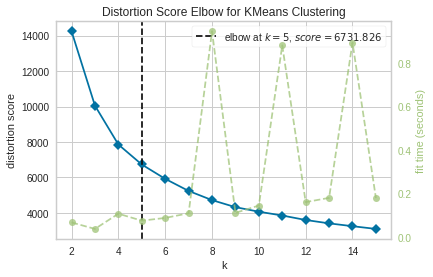

In [44]:
visualizer = KElbowVisualizer(KMeans(), k=15);

visualizer.fit(principalDf);
visualizer.show();

The optimal number of clusters for our data is 5 clusters according to the elbow method.

In [45]:
cluster_k = KMeans(n_clusters=5)
cluster_k.fit(principalDf)

visualize_clustering(principalDf, cluster_k.labels_, title="KMeans Clustering K=5")

In [46]:
db.append(davies_bouldin_score(principalDf, cluster_k.labels_))
sil.append(silhouette_score(principalDf, cluster_k.labels_))

## 7.2 DBSCAN <a class="anchor" id="cluster_db"></a>



In [47]:
cluster_db = DBSCAN(eps=0.2, min_samples=6)
cluster_db.fit(principalDf)

visualize_clustering(principalDf, cluster_db.labels_, title="DBSCAN")

In [48]:
db.append(davies_bouldin_score(principalDf, cluster_db.labels_))
sil.append(silhouette_score(principalDf, cluster_db.labels_))

## 7.3 Agglomerative <a class="anchor" id="cluster_agg"></a>



In [49]:
cluster_agg = AgglomerativeClustering(n_clusters=5)
cluster_agg.fit(principalDf)

visualize_clustering(principalDf, cluster_agg.labels_, title="Agglomerative Clustering K=5")

In [50]:
db.append(davies_bouldin_score(principalDf, cluster_agg.labels_))
sil.append(silhouette_score(principalDf, cluster_agg.labels_))

## 7.4 Evaluation <a class="anchor" id="cluster_eval"></a>



In [51]:
res = pd.DataFrame({'Davies Bouldin Index': db, 'Silhouette Index': sil}, index=['KMeans', 'DBSCAN', 'Agglomerative'])
res.index.names = ['Algorithm']

res

,Davies Bouldin Index,Silhouette Index
Algorithm,,
KMeans,0.884431,0.453153
DBSCAN,0.568676,0.033743
Agglomerative,1.070920,0.323736


In [52]:
# add cluster labels to the original dataset
df['Cluster'] = cluster_k.labels_

df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,CustomerSince,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmpCurrent,NumPurchases,AmountSpent,AmountPerPurchase,PersonsInHome,Cluster
0,1957,UnderGraduate,Single,58138.0,0,0,2012,58,635,88,...,0,0,0,0,1,22,1617,73.167421,2,2
1,1954,UnderGraduate,Single,46344.0,1,1,2014,38,11,1,...,0,0,0,0,0,4,27,6.585366,4,1
2,1965,UnderGraduate,In Relationship,71613.0,0,0,2013,26,426,49,...,0,0,0,0,0,20,776,38.606965,2,2
3,1984,UnderGraduate,In Relationship,26646.0,1,0,2014,26,11,4,...,0,0,0,0,0,6,53,8.688525,3,1
4,1981,PhD,In Relationship,58293.0,1,0,2014,94,173,43,...,0,0,0,0,0,14,422,29.929078,3,0


In [53]:
amount = df.groupby('Cluster').Income.mean()
fig = px.pie(values=np.round(amount.values, 2), names=amount.index,  
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.data[0].textinfo = 'percent+value'
fig.update_layout(title_text='Average Income Per Group', title_x=0.5)

In [54]:
amount = df.groupby('Cluster').AmountPerPurchase.mean()
fig = px.pie(values=np.round(amount.values, 2), names=amount.index,  
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.data[0].textinfo = 'percent+value'
fig.update_layout(title_text='Average Amount Spent in a Single Purchase', title_x=0.5)

# 9 Conclusion
Setelah melakukan segmentasi pelanggan dengan clustering, berbagai segmen pelanggan, dapat disimpulkan bahwa pelanggan termasuk dalam salah satu dari 5 segmen. Segmen ini memiliki atribut berikut:

* Segmen 0
    * Mayoritas memegang gelar sarjana
    * Rata-rata tahun kelahiran mereka sekitar tahun 1965
    * Keluarga mereka mencintai 3-4 orang
    * Mayoritas memiliki remaja di rumah dan 0-1 anak
    * Mayoritas menjalin hubungan, dan sepertiga lajang
    * Pendapatan tahunan rata-rata mereka sekitar \$51.000
    * Mereka menghabiskan sekitar \$31 per pembelian
    * Mereka sering mengkonsumsi penawaran
    * Mereka jarang menerima promosi
    * Konsumen moderat anggur, daging, dan emas
    \* Segmen 1
    * Mayoritas memegang gelar sarjana, dan pemegang PhD dalam jumlah terbesar
    * Rata-rata tahun kelahiran mereka sekitar tahun 1965
    * Keluarga mereka mencintai 3 individu
    * Mayoritas tidak memiliki anak
    * Mayoritas menjalin hubungan, dan sepertiga masih lajang
    * Pendapatan tahunan rata-rata mereka sekitar \$64.200
    * Mereka menghabiskan sekitar \$50,4 per pembelian
    * Mereka kadang-kadang mengkonsumsi penawaran, kebanyakan total 2 penawaran.
    * Mereka jarang menerima promosi
    * Konsumen anggur dan emas yang tinggi. Konsumen daging sedang
* Segmen 2
    * Mereka membuat sebagian besar pelanggan
    * Mayoritas memegang gelar sarjana, dan pemegang gelar Master dalam jumlah terbesar
    * Rata-rata tahun kelahiran mereka sekitar tahun 1973
    * Keluarga mereka mencintaiin 3-4 indiividual, sepersepuluhnya berisi 2
    * Mayoritas memiliki 1 anak, dan 0-1 remaja
    * Mayoritas menjalin hubungan, dan sepertiga masih lajang
    * Pendapatan tahunan rata-rata rendah sekitar \$33.600
    * Mereka membelanjakan sekitar $13 per pembelian
    * Mereka adalah konsumen transaksi terberat. Sekitar 1-3 penawaran per orang
    * Mereka jarang menerima promosi
    * Mereka jarang membeli produk
* Segmen 3
    * Mayoritas memegang gelar sarjana, %25 adalah master dan %25 adalah PhD
    * Rata-rata tahun kelahiran mereka sekitar tahun 1973
    * Keluarga mereka cintain 2 indiividual
    * Mayoritas tidak memiliki anak, jarang anak-anak atau remaja
    * Mayoritas menjalin hubungan, %40 lajang
    * Mereka adalah pelanggan terkaya, dengan pendapatan tahunan sekitar \$80.300
    * Mereka adalah pembelanja terbesar, sekitar \$87,3 per pembelian
    * Mereka jarang mengkonsumsi penawaran, kebanyakan total 1 penawaran per orang.
    * Mereka selalu lebih mungkin menerima promosi.
    * Konsumen anggur tertinggi. Konsumen daging yang tinggi
* Segmen 4
    * Jumlah sarjana tertinggi, %25 adalah master dan %20 adalah PhD
    * Rata-rata tahun kelahiran mereka sekitar tahun 1969
    * Keluarga mereka cintain 2 indiividual
    * Mayoritas tidak memiliki anak
    * Mayoritas menjalin hubungan, %39 lajang
    * Pendapatan tahunan tinggi sekitar \$75.300
    * Pembelanja tinggi, sekitar \$71,6 per pembelian
    * Mereka adalah konsumen terbanyak kedua dari penawaran, kebanyakan total 1 penawaran per orang.
    * Mereka terkadang menerima promosi.
    * Konsumen tertinggi daging, ikan, dan buah-buahan. Konsumen anggur yang tinggi